**Cotton_Disease**

# 1951 images for training with 4 labels as 'diseased cotton leaf','diseased cotton plant','fresh cotton leaf','fresh cotton plant' and for validation 253 images

In [1]:
import pandas as pd
import numpy  as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam 
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image
from keras.callbacks import ModelCheckpoint
from keras.models import *
from keras.layers import *

In [2]:
train_data_path='/content/drive/MyDrive/Cotton_train_Data'
valid_data_path='/content/drive/MyDrive/Cotton_val_Data'

In [3]:
training_datagen = ImageDataGenerator(rescale = 1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   fill_mode='nearest',
                                   horizontal_flip = True)

In [4]:
training_data=training_datagen.flow_from_directory(train_data_path, 
                                      target_size=(224,224), 
                                      batch_size=32,
                                      class_mode='sparse')

Found 1951 images belonging to 4 classes.


In [5]:
training_data.class_indices

{'diseased cotton leaf': 0,
 'diseased cotton plant': 1,
 'fresh cotton leaf': 2,
 'fresh cotton plant': 3}

In [6]:
valid_datagen=ImageDataGenerator(rescale=1./255)

In [7]:
Validation_data=valid_datagen.flow_from_directory(valid_data_path, 
                                      target_size=(224,224), 
                                      batch_size=32,
                                      class_mode='sparse')

Found 253 images belonging to 4 classes.


In [8]:
model=VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

58900480/58889256 [==============================] - 1s 0us/step


In [9]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [10]:
model.trainable=False

In [11]:
model = tensorflow.keras.Sequential([
    model,
    GlobalMaxPool2D()
])

In [12]:
model.add(Dense(4,activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_max_pooling2d (Globa  (None, 512)              0         
 lMaxPooling2D)                                                  
                                                                 
 dense (Dense)               (None, 4)                 2052      
                                                                 
Total params: 14,716,740
Trainable params: 2,052
Non-trainable params: 14,714,688
_________________________________________________________________


In [14]:
model.compile(optimizer ='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
model_path = '/content/drive/MyDrive/CNN_Cotton_Disease_project/CNN_Cotton_Disease_project_VGG.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint] 

In [18]:
history=model.fit(training_data,epochs=50, verbose=1, validation_data= Validation_data,steps_per_epoch=len(training_data),
  validation_steps=len(Validation_data),
              callbacks=callbacks_list)

Epoch 1/50
61/61 [==============================] - ETA: 0s - loss: 0.3936 - accuracy: 0.8570
Epoch 1: val_accuracy improved from 0.84980 to 0.85375, saving model to /content/drive/MyDrive/CNN_Cotton_Disease_project/CNN_Cotton_Disease_project_VGG.h5
61/61 [==============================] - 49s 794ms/step - loss: 0.3936 - accuracy: 0.8570 - val_loss: 0.3885 - val_accuracy: 0.8538
Epoch 2/50
61/61 [==============================] - ETA: 0s - loss: 0.3826 - accuracy: 0.8606
Epoch 2: val_accuracy improved from 0.85375 to 0.85771, saving model to /content/drive/MyDrive/CNN_Cotton_Disease_project/CNN_Cotton_Disease_project_VGG.h5
61/61 [==============================] - 49s 794ms/step - loss: 0.3826 - accuracy: 0.8606 - val_loss: 0.3767 - val_accuracy: 0.8577
Epoch 3/50
61/61 [==============================] - ETA: 0s - loss: 0.3816 - accuracy: 0.8642
Epoch 3: val_accuracy did not improve from 0.85771
61/61 [==============================] - 49s 802ms/step - loss: 0.3816 - accuracy: 0.8642 -

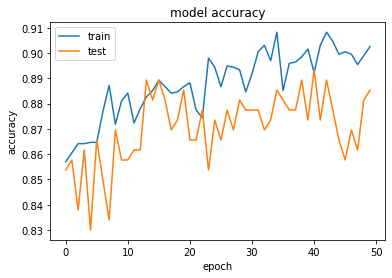

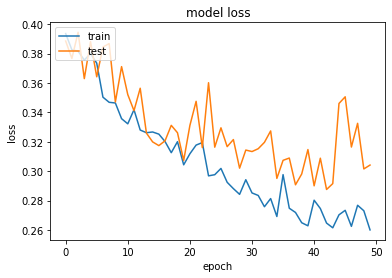

In [19]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()